In [1]:
# includes game, includes model
from image_to_settings import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings)

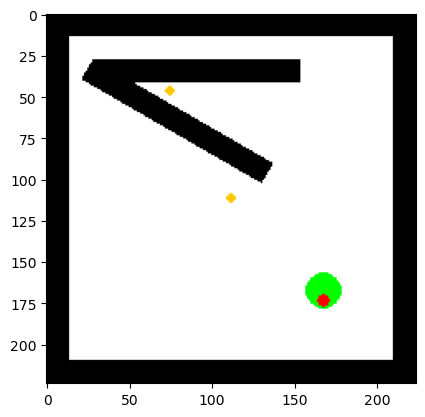

In [3]:
import matplotlib.pyplot as plt
plt.imshow(G.getData())

In [4]:
from visual_transformer import *
device = torch.device('cuda:0') # doing this on the 2080

In [5]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

In [6]:
def get_settings_batch(batch_size):
    return [G.random_bare_settings(gameSize=224, max_agent_offset=(0.15 + 0.4*i/batch_size)) for i in range(1, batch_size + 1)] 
    
def get_images(settings_batch, device=device):
    batch_size = len(settings_batch)
    img = torch.zeros(batch_size, 224, 224, 3)
    for i in range(batch_size):
        G2 = discreteGame(settings_batch[i])
        img[i] = torch.tensor(G2.getData())
    img = torch.permute(img, (0, 3, 1, 2)).contiguous().to(device)
    return img 


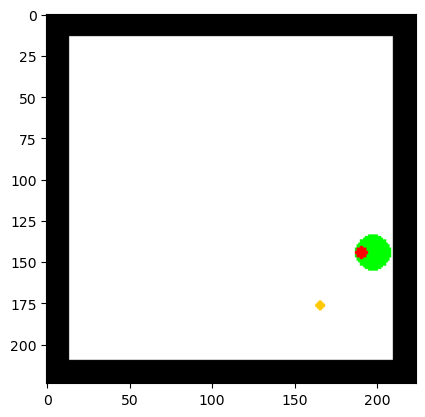

In [7]:
batch_size = 16
S = get_settings_batch(batch_size)
imgs = get_images(S)
quick_display(imgs[1])

In [8]:
agent_centers, directions, agent_radii = get_agent_info(imgs)

In [9]:
agent_centers

tensor([[0.2879, 0.2969],
        [0.6451, 0.8817],
        [0.1317, 0.1763],
        [0.2612, 0.4129],
        [0.6674, 0.7299],
        [0.6183, 0.6987],
        [0.8237, 0.6987],
        [0.2479, 0.6496],
        [0.4085, 0.7656],
        [0.4754, 0.4174],
        [0.6272, 0.8237],
        [0.7388, 0.3817],
        [0.7478, 0.3281],
        [0.3058, 0.2165],
        [0.8594, 0.5424],
        [0.6585, 0.4442]], device='cuda:0')

In [10]:
agent_radii

tensor([0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0330, 0.0329,
        0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329, 0.0329],
       device='cuda:0')

In [11]:
directions

tensor([0.1419, 4.7124, 5.1760, 2.9997, 1.7359, 2.9997, 1.2925, 0.5877, 5.8195,
        2.6779, 3.6052, 0.4636, 2.2455, 1.0304, 4.0376, 3.4633],
       device='cuda:0')

In [12]:
S[0].__dict__

{'gameSize': 224,
 'direction': 0.19901231693416005,
 'agent_x': 0.29219233828848934,
 'agent_y': 0.30051742830614137,
 'agent_r': 0.05,
 'gold_r': 0.015625,
 'gold': [(0.388480166942318, 0.448321052661105)],
 'walls': [[0, 0, 0.0625, 1.0, 0],
  [0, 0, 1.0, 0.0625, 0],
  [0, 0.9375, 1.0, 0.0625, 0],
  [0.9375, 0, 0.0625, 1.0, 0]]}

In [13]:
gold_centers = get_SINGLE_gold_info(imgs)

In [14]:
gold_centers

tensor([[0.3862, 0.4442],
        [0.7879, 0.7388],
        [0.1585, 0.3013],
        [0.3951, 0.5067],
        [0.7254, 0.5290],
        [0.9085, 0.8906],
        [0.8103, 0.8728],
        [0.4621, 0.7478],
        [0.3192, 0.7612],
        [0.7299, 0.3147],
        [0.7701, 0.8906],
        [0.4040, 0.3415],
        [0.8638, 0.6808],
        [0.7790, 0.4933],
        [0.4397, 0.2790],
        [0.3237, 0.8549]], device='cuda:0')

In [15]:
gold_masks = get_color_masks(imgs, GOLD)

In [16]:
gold_r = S[0].gold_r

In [17]:
all_gold = get_all_gold(gold_masks[0] + gold_masks[1] + gold_masks[2], gold_r)

In [18]:
S[0].__dict__

{'gameSize': 224,
 'direction': 0.19901231693416005,
 'agent_x': 0.29219233828848934,
 'agent_y': 0.30051742830614137,
 'agent_r': 0.05,
 'gold_r': 0.015625,
 'gold': [(0.388480166942318, 0.448321052661105)],
 'walls': [[0, 0, 0.0625, 1.0, 0],
  [0, 0, 1.0, 0.0625, 0],
  [0, 0.9375, 1.0, 0.0625, 0],
  [0.9375, 0, 0.0625, 1.0, 0]]}

In [19]:
all_gold

[(0.7857142857142857, 0.734375),
 (0.38392857142857145, 0.43973214285714285),
 (0.15625, 0.296875)]

In [20]:
# hell yes